**Vanessa Navarro Coronado e Iván Sánchez Castellanos**

# Práctica 1 NO TERMINADA

Primero importamos las librerías que vamos a usar

In [1]:
# Always load all scipy stack packages
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

# Misc
import base64

In [2]:
# This code configures matplotlib for proper rendering
%matplotlib inline
mpl.rcParams["figure.figsize"] = "8, 4"
import warnings
warnings.simplefilter("ignore")

Esto es para realizar nuestros procesos de holdout con una semilla, para poder reproducir nuestros resultados

In [3]:
# En vuestros experimentos usad siempre una semilla, si no nunca los podreis recuperar
seed=6342
np.random.seed(6342) #DECLARARLA AL PRINCIPIO DEL CUADERNO Y BORRAR EL KERNEL

## 1. Análisis exploratorio mediante gráficas y estadísticos. Interpretación de las distribuciones de las variables más relevantes y su relación con la clase. Identificación de anomalías y tratamiento de datos perdidos.

### Análisis exploratorio

Cargamos las bases de datos

In [4]:
# Please update your data path accordingly
df1 = pd.read_csv("../data/pima.csv", dtype={ "label": 'category'})
df2 = pd.read_csv("../data/wisconsin.csv", dtype={ "label": 'category'})

Comprobamos que se han cargado los datasets

In [5]:
# Retrieve a random sample from the dataframe
df1.sample(8)

,preg,plas,pres,skin,insu,mass,pedi,age,label
408,8,100,74,40,215,39.4,0.661,43,tested_positive
722,1,88,78,29,76,32.0,0.365,29,tested_negative
668,4,116,72,12,87,22.1,0.463,37,tested_negative
121,2,108,62,32,56,25.2,0.128,21,tested_negative
239,1,199,76,43,0,42.9,1.394,22,tested_positive
30,7,133,88,15,155,32.4,0.262,37,tested_negative
109,1,119,54,13,50,22.3,0.205,24,tested_negative
675,1,151,60,0,0,26.1,0.179,22,tested_negative


In [6]:
# Retrieve a random sample from the dataframe
df2.sample(8)

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
155,156,3,1,1,1,2,1.0,3,1,1,benign
109,110,4,5,5,10,4,10.0,7,5,8,malignant
183,184,9,7,7,5,5,10.0,7,8,3,malignant
258,259,1,4,3,10,4,10.0,5,6,1,malignant
473,474,3,1,1,1,2,1.0,2,1,1,benign
26,27,5,1,1,1,2,1.0,2,1,1,benign
515,516,4,1,1,1,2,3.0,2,1,1,benign
200,201,6,10,7,7,6,NaN,8,10,2,malignant


Analizamos los datasets

In [7]:
# Number of cases is just the length of the dataframe
print( len(df1) )
print( df1.shape )
print( df1.size ) # multiplcación de filas x columnas

768
(768, 9)
6912


In [8]:
# Number of cases is just the length of the dataframe
print( len(df2) )
print( df2.shape )
print( df2.size ) # multiplcación de filas x columnas

699
(699, 11)
7689


Obtenemos los valores de las variables clase en ambos datasets.

In [9]:
# We can inspect categorical variables:
df1.label.cat.categories

Index(['tested_negative', 'tested_positive'], dtype='object')

In [10]:
# We can inspect categorical variables:
df2.label.cat.categories

Index(['benign', 'malignant'], dtype='object')

### Interpretación de las distribuciones de las variables

Visualizamos los datasets con los histogramas.

In [11]:
def gMultipleHistogram(targetdf):
    # First we remove the class variable
    target_noclass = targetdf.drop('label', 1) #USAR SIEMPRE 'LABEL', PORQUE 'CLASS' ES PALABRA RESERVADA
    # Now we generate the multiple histogram
    g = sns.FacetGrid(pd.melt(target_noclass), col="variable", sharey=False, sharex=False, col_wrap=2)
    g.map(sns.distplot, "value");

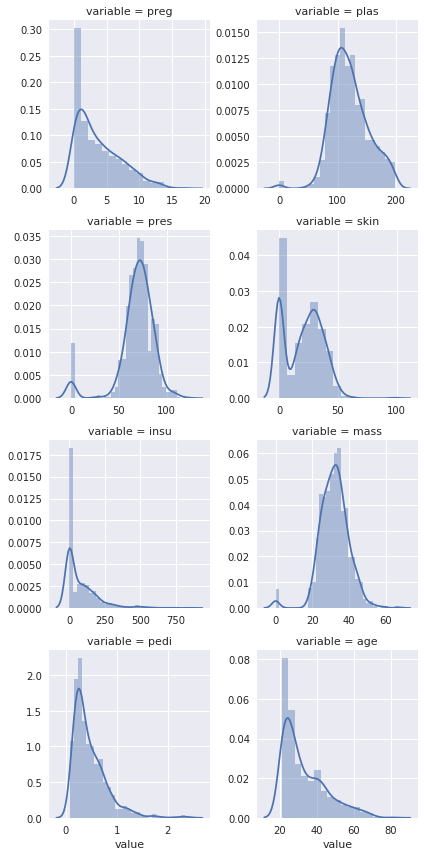

In [12]:
gMultipleHistogram(df1)

En este dataset, observamos que las variables plas, pres y mass tienen una distribución gaussiana, aunque se pueden observar algunos outliers. La variable skin presenta una distribución más compleja, y el resto de variables tienen una distribución con asimetría negativa (right skewed). 

Por ejemplo, en el caso de la variable preg, se observa una gran cantidad de población que no ha estado nunca embarazada, por lo que podríamos pensar que son niños/as, hombres, o simplemente mujeres que no han estado embarazadas.

Los valores a cero en algunas de las variables como plas, pres, skin, insu y mass nos pueden hacer pensar que sean valores perdidos, o anómalos.

En el dataset df2 (wisconsin) tenemos una variable id que no nos aporta nada sobre las demás variables, o sobre la variable clase. Por tanto, prescindimos de ella.

In [13]:
df2_sinId=df2.drop('patientId',1)

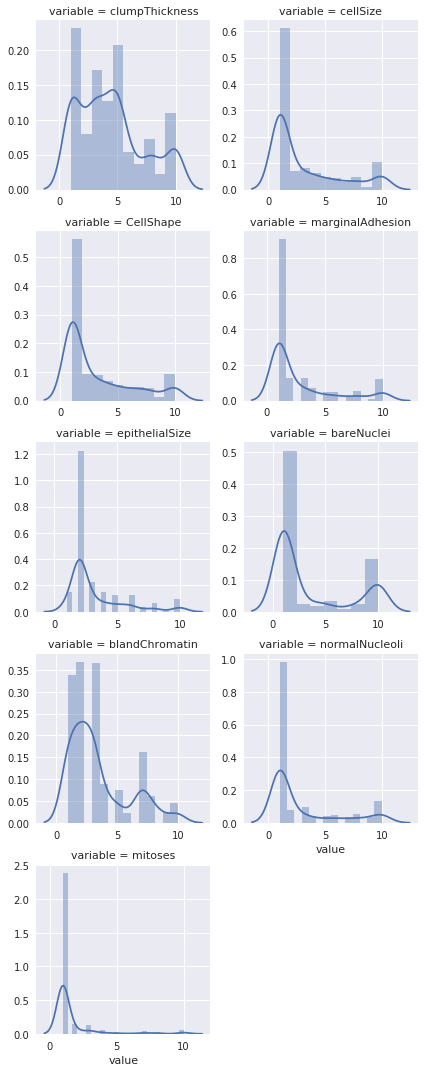

In [14]:
gMultipleHistogram(df2_sinId)

Observando estas distribuciones, vemos que ninguna variable presenta una distribución normal. Esto puede ser debido a la presencia de valores perdidos, o valores anómalos, como por ejemplo en las variables CellShape o normalNucleoli.

### Estadísticos

In [15]:
df1.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [16]:
df2.describe()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,667.000000,699.000000,699.000000,699.000000
mean,350.000000,4.417740,3.134478,3.207439,2.806867,3.216023,3.536732,3.437768,2.866953,1.589413
std,201.928205,2.815741,3.051459,2.971913,2.855379,2.214300,3.683795,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,175.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,350.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,524.500000,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000
max,699.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Estos estadísticos nos vendrán bien para realizar el tratamiento de valores perdidos, ya que existen métodos como por ejemplo el de rellenar los valores perdidos con la media, o la moda.

### Identificación de anomalías y tratamiento de datos perdidos

En el dataset pima, los valores perdidos no se representan con NA o NaN, sino que podrían estar representados con 0. Sin embargo, puede que alguna de las variables tenga este valor dentro de su dominio, por lo que en este caso no sería un valor perdido. 

Para saber si un cero en nuestro dataset es un valor perdido o no, deberíamos consultar con un experto en medicina que conozca las unidades de medida de estas variables, y sus posibles rangos de valores.

En el dataset wisconsin es más sencillo identificar los valores perdidos, ya que estos están representados como NA. En este caso, podemos tratarlos de varias formas:
* Eliminar el caso que contenga valores perdidos: este método sería muy arriesgado ya que, si hay muchos valores perdidos, perderíamos gran parte del dataset.
* Eliminar la variable que contenga valores perdidos: este método tampoco lo vamos a usar, porque, aunque los valores NA solo aparecen en la variable bareNuclei, perderíamos muchos datos si eliminásemos dicha variable.
* Rellenar valores perdidos con algún valor concreto: en nuestro caso, esta será la técnica que vamos a usar, y rellenaremos los valores con la media.

In [17]:
# Calculamos el vector de medias
meansValues2 = df2.mean()
prueba2=df2_sinId.copy()

# Ahora lo usamos para rellenar:
cleanDf2 = prueba2.fillna( meansValues2 )

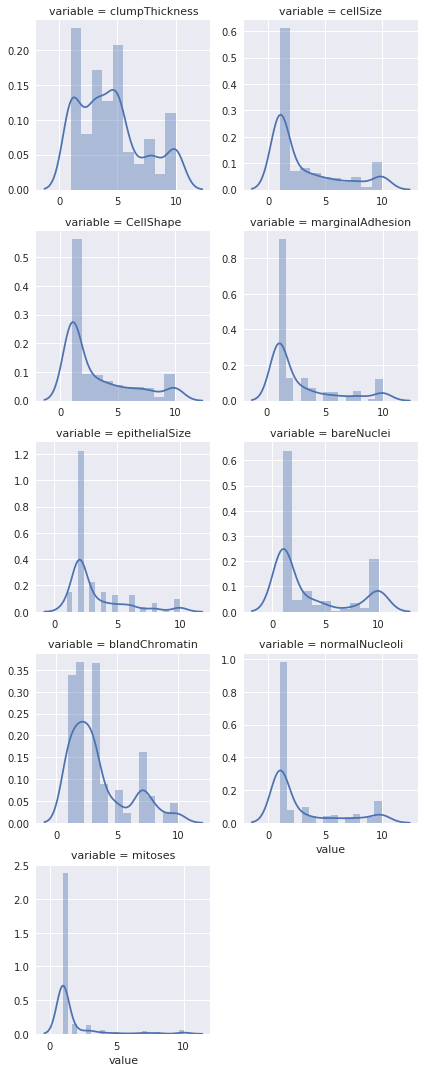

In [18]:
gMultipleHistogram(cleanDf2)

### La clase

Para ver la distribución de la clase, usaremos los diagramas de barras que aparecen a continuación.

In [19]:
def gSingleBarplot(targetDf, targetVar):
    sns.countplot(data=targetDf, x=targetVar)

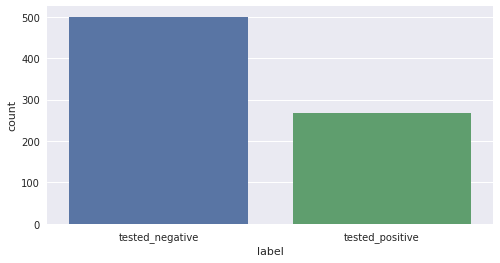

In [20]:
gSingleBarplot(df1, "label") #para ver los 2 estados de la variable categorica

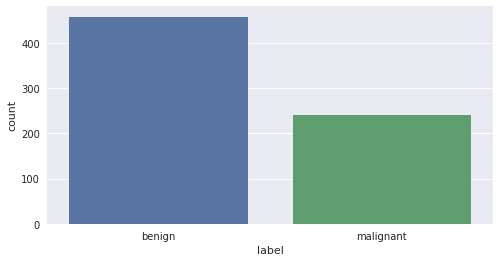

In [21]:
gSingleBarplot(cleanDf2, "label") #para ver los 2 estados de la variable categorica

Como vemos, hay más casos clasificados como tested_negative que como tested_positive. Y lo mismo ocurre con el dataset wisconsin: hay más casos de bening que de malign.

Por ello, a la hora de realizar las particiones de Train y Test para nuestro proceso de holdout, tendremos que tener en cuenta esta proporción de casos.

## 2. Aprendizaje y evaluación de un clasificador zeroR (con holdout).

In [22]:
df1.label.mode()

0    tested_negative
Name: label, dtype: category
Categories (2, object): [tested_negative, tested_positive]

In [23]:
cleanDf2.label.mode()

0    benign
Name: label, dtype: category
Categories (2, object): [benign, malignant]

Primero debemos usar la función trainZeroR, que se nos proporcionaba en el guión de la práctica 1, para crear nuestro clasificador ZeroR. Con este clasificador, nuevas instancias en el dataset deberán ser predichas usando la etiqueta mayoritaria en nuestra variable clase (label). Para ello, creamos una nueva columna en el dataset llamada prediction.

In [24]:
# This is the outer function that should return the classifier function
def trainZeroR(trainingData):
    # We first learn the parameters, aka, the most probable class
    # Tip! get the class variable mode and take the first value
    majorClass = trainingData.label.mode()[0]# <-- COMPLETE
    
    # Now we create and return the classifier function
    def classifier( data ):
        return data.assign( prediction=majorClass ) # <-- COMPLETE
    
    return classifier

Antes de probar el clasificador con nuestros datasets, debemos realizar un proceso de holdout estratificado, en el que haya una parte proporcionada de la base de datos que se utilice para entrenar el clasificador (Train), y otra parte del dataset que usemos para validar nuestro modelo aprendido (Test). 

Lo primero que debemos hacer es desordenar la base de datos usando nuestra semilla (declarada al principio del cuaderno) para que permute los índices de los casos, consiguiendo así una partición balanceada de los casos.

La función train_test_split se encarga de hacer esto, y también de realizar la partición en dos conjuntos Train y Test.

In [25]:
# We must always divide our dataset into attributes and label
attributesdf1 = df1.drop('label', 1)
labeldf1 = df1['label']

attributesdf2 = cleanDf2.drop('label', 1)
labeldf2 = cleanDf2['label']

In [26]:
from sklearn.model_selection import train_test_split
train_atts1, test_atts1, train_label1, test_label1 = train_test_split( 
    attributesdf1, # Dataset con los atributos
    labeldf1, # Vector/dataset con la clase
    test_size=0.4, # Proporcion de test
    random_state=seed, # Semilla
    stratify=labeldf1) # Variable a estratificar

In [27]:
from sklearn.model_selection import train_test_split
train_atts2, test_atts2, train_label2, test_label2 = train_test_split( 
    attributesdf2, # Dataset con los atributos
    labeldf2, # Vector/dataset con la clase
    test_size=0.4, # Proporcion de test
    random_state=seed, # Semilla
    stratify=labeldf2) # Variable a estratificar

In [28]:
pimaTraining = train_atts1.assign(label = train_label1)
pimaTest = test_atts1.assign(label = test_label1)

wisconsinTraining = train_atts2.assign(label = train_label2)
wisconsinTest = test_atts2.assign(label = test_label2)

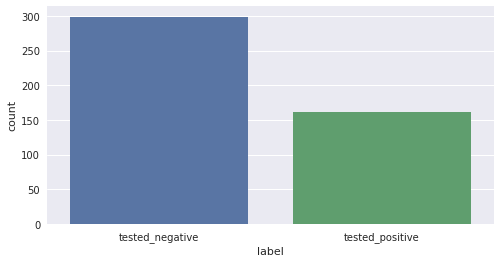

In [29]:
gSingleBarplot(pimaTraining, "label")

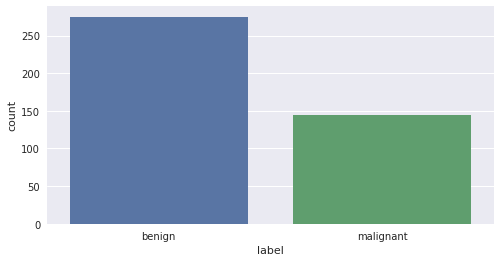

In [30]:
gSingleBarplot(wisconsinTraining, "label")

A continuación usamos la función trainAndEvalClassifier del guión de la práctica1, para entrenar el clasificador, y validarlo con el conjunto de test.

In [31]:
# The star notated argument are cale varargs, and can be passed to inner functions
def trainAndEvalClassifier(classifier, trainingDf, testDf, **kwargs):
    model = classifier(trainingDf, **kwargs)
    predictedDf = model(testDf)
    tab = pd.crosstab(predictedDf['label'], predictedDf['prediction'])
    comparison = predictedDf[predictedDf['label'] == predictedDf['prediction'] ]
    accuracy = len(comparison) / len(predictedDf)
    return (tab, accuracy)

Primero con pima

In [32]:
(tab1, accuracy1) = trainAndEvalClassifier(trainZeroR, pimaTraining, pimaTest)

In [33]:
tab1

prediction,tested_negative
label,
tested_negative,201
tested_positive,107


In [34]:
print("Accuracy pima:", accuracy1)

Accuracy pima: 0.6525974025974026


Y ahora con el dataset wisconsin

In [35]:
(tab2, accuracy2) = trainAndEvalClassifier(trainZeroR, wisconsinTraining, wisconsinTest)

In [36]:
tab2

prediction,benign
label,
benign,183
malignant,97


In [37]:
print("Accuracy wisconsin:", accuracy2)

Accuracy wisconsin: 0.6535714285714286


Como el ZeroR siempre predice la clase mayoritaria, todos los casos que no pertenezcan a esta, serán mal clasificados. El accuracy solo mide la tasa de aciertos conseguida, por lo que no tiene en cuenta las instancias mal clasificadas. Para saber si este clasificador es verdaderamente bueno, deberíamos analizar su curva ROC y el AUC, ya que esta medida tiene en cuenta tanto los aciertos como los fallos en las predicciones.

## 3. Aprendizaje y evaluación de un clasificador oneR (con holdout).

Para implementar este clasificador usamos la función trainOneR que se nos proporcionaba (incompleta) en el guión de la práctica 1. Esta función recibe como parámetros el conjunto de Train y el número de particiones que deberá realizar para entrenar dicho conjunto.

Lo primero que hace esta función es recorrer los atributos del dataset. Para cada atributo, realiza una partición en 3 bins para poder discretizar sus valores, y después forma la matriz de confusión y calcula el error cometido.

Una vez hecho esto para todos los atributos del dataset, nos quedaremos con el atributo que menor error haya conseguido en sus predicciones, y guardaremos los valores asignados de la clase para cada uno de los intervalos de dicho atributo.

Por último, solo queda probar con el conjunto de Test. Para cada nueva instancia, se comprobará en qué intervalo (de los creados para el mejor atributo) cae su valor para el atributo elegido, y le asignaremos la clase que corresponda a dicho intervalo. 

In [38]:
# Complete the code when indicated with ???

# Outer learning function, hyperparameter nbins=1 is equivalent to zeroR if all attributes are continuous
def trainOneR(trainingData, nbins = 1, debug = True):
    # Debug: 
    if debug:
        print("-----------------------------------")
        print("Training OneR")
        print("-----------------------------------")
        print("attribute\terror")
    # ------------------------------------

    # Loop maximization variables
    best_attribute = ''
    best_partitions = []
    best_classes = []
    best_error =  float("inf")

    # We discretize each attribute and compute its error
    for att in trainingData.columns.values: 
        # We must ignore the class variable
        if att == 'label': continue

        # First we generate the partitions
        (attribute, bins) = pd.cut(trainingData[att], bins=3, retbins=True) #los bins son por igual anchura

        # The we must compute the error
        tab = pd.crosstab(attribute, trainingData['label'])
        #print(tab)
        error = sum( [ sum(f) - max(f) for f in tab.values ] ) #para cada fila calculamos su error y sumamos para obtener el total

        # We can show each variable individual error
        if debug:
            print(att, "\t", error)
        # ----------------------------------------
        
        # Lastly we compare if this attribute is better than the previous local optima
        if (error < best_error):
            # If that is the case we store it as the current local optima
            best_attribute  = att
            best_partitions = bins[1:]
            # We must store the majority class for each interval in order to assign it
            # during classification
            best_classes = [ tab.columns[f.argmax()] for f in tab.values ] #para cada intervalo, calculamos la clase mayoritaria
            best_error = error

    # Now we generate the classifier function regarding the previous parameters
    def classifier( testData ):
        # It simply assigns the majority class for each interval
        # For that we can use an auxiliar function to check which interval the current value
        # for the optimal attribute belongs to and assign the stored majority class
        def assignClass( attValue ):
            for i in range(nbins):
                if attValue <= best_partitions[i]:
                    return best_classes[i]

        # Now we apply the previous function to all the instances in the dataset
        # Remember that when using map in python3 we must cast the result as list
        prediction = list(map( assignClass, testData[best_attribute] ))
        return testData.assign( prediction=prediction )
    
    print("-----------------------------------")
    print("Best Attribute: ", best_attribute)
    return classifier

A continuación usamos la función trainAndEvalClassifier del guión de la práctica1, para entrenar el clasificador, y validarlo con el conjunto de test.

In [39]:
(tab1, accuracy1) = trainAndEvalClassifier(trainOneR, pimaTraining, pimaTest, nbins=len(df1.label.unique()))

-----------------------------------
Training OneR
-----------------------------------
attribute	error
preg 	 153
plas 	 122
pres 	 161
skin 	 160
insu 	 156
mass 	 157
pedi 	 161
age 	 151
-----------------------------------
Best Attribute:  plas


In [40]:
tab1

prediction,tested_negative
label,
tested_negative,164
tested_positive,42


In [41]:
print("Accuracy pima: ",accuracy1)

Accuracy pima:  0.5324675324675324


Este accuracy es aún más bajo que el obtenido con ZeroR, por lo que podríamos concluir que no podríamos clasificar los casos en base a un solo atributo del dataset. Deberíamos analizar los demás atributos para saber cuál es la clase a la que pertenecerían.

In [42]:
(tab2, accuracy2) = trainAndEvalClassifier(trainOneR, wisconsinTraining, wisconsinTest, nbins=len(cleanDf2.label.unique()))

-----------------------------------
Training OneR
-----------------------------------
attribute	error
clumpThickness 	 70
cellSize 	 45
CellShape 	 44
marginalAdhesion 	 71
epithelialSize 	 76
bareNuclei 	 42
blandChromatin 	 57
normalNucleoli 	 65
mitoses 	 123
-----------------------------------
Best Attribute:  bareNuclei


In [43]:
tab2

prediction,benign,malignant
label,,
benign,178,4
malignant,25,12


In [44]:
print("Accuracy wisconsin: ",accuracy2)

Accuracy wisconsin:  0.6785714285714286


Este accuracy es solo un poco más alto que el obtenido con ZeroR, por lo que deberíamos pensar que es necesario tener en cuenta más atributos a la hora de clasificar las instancias.

### Algunas consideraciones

Como hemos visto con el clasificador OneR, los mejores atributos para los dataset pima y wisconsin, respectivamente, son plas y bareNuclei. Al analizar sus diagramas de cajas, vemos claramente que existe una diferenciación de la clase teniendo en cuenta estos atributos, sobretodo en el dataset wisconsin usando el atributo bareNuclei.

In [45]:
def gSingleBoxplot(targetdf, att):
    sns.boxplot(x='label', y=att, data=targetdf)

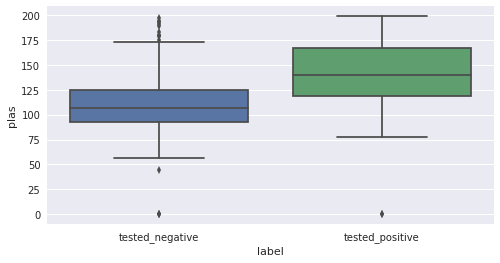

In [46]:
gSingleBoxplot(df1,'plas')

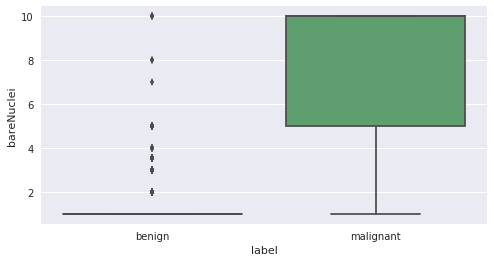

In [47]:
gSingleBoxplot(cleanDf2,'bareNuclei')

## 4. Aprendizaje y evaluación de un árbol de decisión (con holdout).

Para utilizar este algoritmo debemos usar el paquete scikit-learn, tal y como aparece en el guión de la práctica 1, para poder aprender un árbol de decisión para cada uno de nuestros dos datasets. 

In [48]:
from sklearn import tree
# Init the models(set hyperparameters)
model1 = tree.DecisionTreeClassifier(random_state=seed)
model2 = tree.DecisionTreeClassifier(random_state=seed)

Como ya venimos haciendo en procesos anteriores, esta librería necesita que nuestros conjuntos de entrenamiento provenientes de los datasets estén separados en dos conjuntos de datos: por un lado los atributos y por otro la clase.

In [49]:
features1 = pimaTraining.drop('label',1)
labels1 = pimaTraining['label']

features2 = wisconsinTraining.drop('label',1)
labels2 = wisconsinTraining['label']

A continuación, debemos aprender un modelo para cada uno de nuestros datasets usando la función fit de la librería.

In [50]:
# Use fit to learn from a configured model
classifier1 = model1.fit(features1, labels1)
classifier2 = model2.fit(features2, labels2)

Por último, usamos el conjunto de test para predecir la clase de cada una de las instancias, y comprobamos los resultados con su matriz de confunsión y el accuracy.

In [51]:
testFeatures1 = pimaTest.drop('label',1)
prediction1 = classifier1.predict(testFeatures1)

testFeatures2 = wisconsinTest.drop('label',1)
prediction2 = classifier2.predict(testFeatures2)

In [52]:
pd.crosstab(pimaTest['label'], prediction1)

col_0,tested_negative,tested_positive
label,,
tested_negative,153,48
tested_positive,33,74


In [53]:
pd.crosstab(wisconsinTest['label'], prediction2)

col_0,benign,malignant
label,,
benign,178,5
malignant,12,85


In [54]:
comparison1 = pimaTest[pimaTest['label'] == prediction1]
accuracy1 = len(comparison1) / len(pimaTest)
print("Accuracy pima:", accuracy1)

Accuracy pima: 0.737012987012987


In [55]:
comparison2 = wisconsinTest[wisconsinTest['label'] == prediction2]
accuracy2 = len(comparison2) / len(wisconsinTest)
print("Accuracy wisconsin:", accuracy2)

Accuracy wisconsin: 0.9392857142857143


## 5. Comparativa de los tres algoritmos.